## This purpose of this notebook it to visualize the wordcloud of job descriptions.
### From the statistic of applications, I found out that it seems like most of the job descriptions are related to technology or analytical role. Therefore, I visualized the statistic plot and worldcloud to understand it

In [1]:
import os
import seaborn as sns
import sklearn as sl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from cat_data import dummyEncode, plot_cat_info
from misc import uni_wage,generate_list
#plt.style.use('ggplot')
%matplotlib inline 

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [102]:
def generate_word(df):
    list_ = []
    for idx, row in df.iterrows():
        times = row[1]
        list_.append([row[0]]*times)
    return list_

def extract_word(word_l):
    temp = []
    for x in word_l:
        for y in x:
            a = y.split(" ")
            if len(a) >1:
                for j in a:
                    temp.append(j)
            else:
                temp.append(a[0])
    return temp

In [2]:
H1B_data = pd.read_csv('enigma-h1b.csv')
H1B_data = H1B_data[H1B_data["visa_class"] =="H-1B"]

### Top 5 SOC name and job title is highly related to computer programming

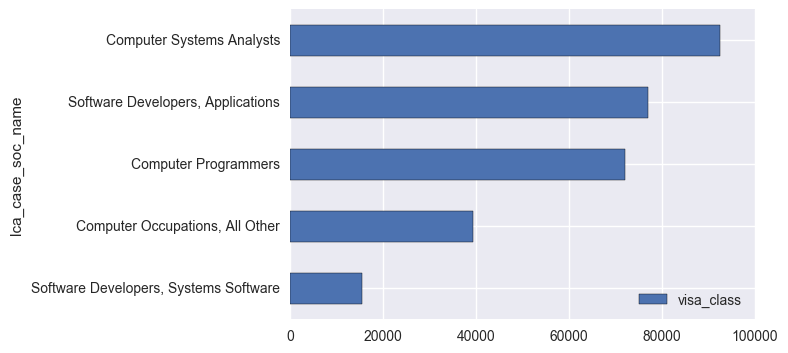

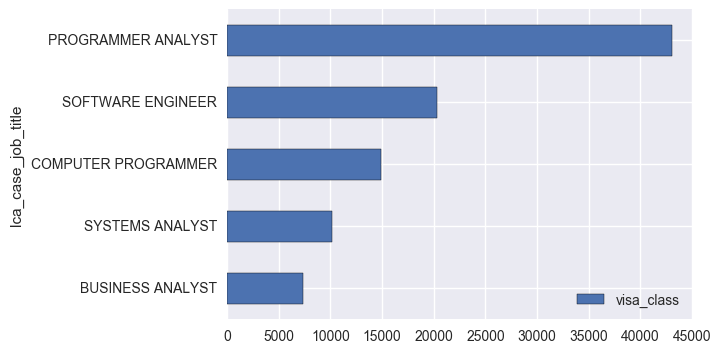

In [9]:
soc_name = plot_cat_info(H1B_data,'visa_class', 'lca_case_soc_name',True)
job_title = plot_cat_info(H1B_data,'visa_class', 'lca_case_job_title',True)

In [100]:
name_list = []
name_list.append(soc_name.reset_index())
name_list.append(job_title.reset_index())

word_list = []
for df in name_list:
    word_list.extend(extract_word(generate_word(df)))

text = " ".join(word_list)

(-0.5, 399.5, 199.5, -0.5)

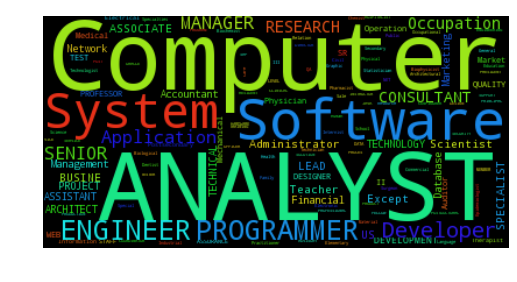

In [101]:
from wordcloud import WordCloud
from PIL import Image
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:

plt.imshow(wordcloud)
plt.axis("off")